In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
from tensorflow import keras
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt

In [2]:
m = keras.models.load_model('best-cnn-model.h5')

In [3]:
m.layers

In [4]:
conv = m.layers[0]
conv.weights[0].shape, conv.weights[1].shape,

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [9]:
w = conv.weights[0].numpy()
w

array([[[[ 2.21288595e-02,  1.18758632e-02, -9.91183639e-01,
           2.16505732e-02, -3.02191198e-01,  7.18062818e-02,
           1.10263646e-01, -1.65853556e-02, -5.09299278e-01,
          -2.16919601e-01, -1.75998956e-01,  8.67725089e-02,
          -2.70691216e-01,  4.35824692e-03,  7.95022771e-03,
           2.88674742e-01, -5.20255923e-01,  4.63815868e-01,
           3.76092158e-02, -6.57655597e-02,  5.62543049e-02,
          -1.84926465e-02, -5.73071055e-02,  4.21957336e-02,
          -3.86252888e-02, -1.47425279e-01,  1.86132923e-01,
          -2.10545883e-01,  6.74098209e-02, -7.87891448e-02,
           9.48137492e-02, -1.92436814e-01]],

        [[ 1.75814028e-03,  2.65844792e-01,  4.03808765e-02,
          -1.40874892e-01,  2.54900396e-01,  1.16736077e-01,
          -8.89832079e-02,  3.86310183e-02, -5.14602602e-01,
           1.17547326e-01,  2.46567905e-01, -2.15425208e-01,
           2.46337384e-01, -1.11000361e-02,  8.71461481e-02,
          -1.43063858e-01,  1.30342647

In [8]:
w.mean(), w.std()

(-0.025312617, 0.25047907)

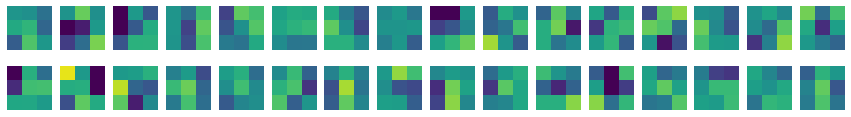

In [11]:
#학습O
fig, axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(w[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

In [14]:
n_m=keras.Sequential()
n_m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                            padding='same',input_shape=(28,28,1)))

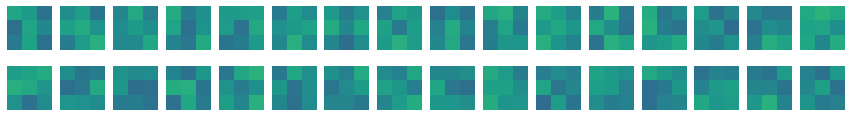

In [15]:
#학습X
conv = n_m.layers[0]
n_w = conv.weights[0].numpy()
fig, axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(n_w[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

(array([  1.,   0.,   1.,   4.,   0.,   8.,  51.,  92., 105.,  26.]),
 array([-1.6779169 , -1.4637436 , -1.2495704 , -1.035397  , -0.8212238 ,
        -0.60705054, -0.39287722, -0.17870396,  0.03546932,  0.2496426 ,
         0.46381587], dtype=float32),
 <BarContainer object of 10 artists>)

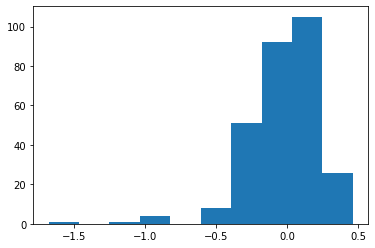

In [16]:
plt.hist(w.reshape(-1,1))

(array([31., 24., 32., 33., 29., 25., 36., 24., 25., 29.]),
 array([-0.14193562, -0.1136645 , -0.08539338, -0.05712227, -0.02885115,
        -0.00058004,  0.02769108,  0.0559622 ,  0.08423331,  0.11250443,
         0.14077555], dtype=float32),
 <BarContainer object of 10 artists>)

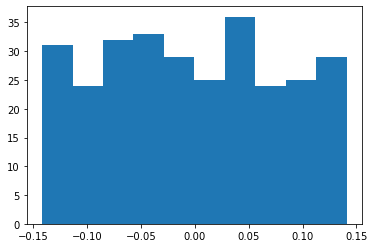

In [18]:
plt.hist(n_w.reshape(-1,1))

In [19]:
m.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [24]:
cov_act1 = keras.Model(m.input,m.layers[0].output)
(x_data,y_data),(t_x_data,t_y_data) = keras.datasets.fashion_mnist.load_data()
in_data = x_data.reshape(-1,28,28,1)/255.0

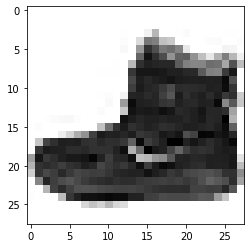

In [25]:
plt.imshow(x_data[0],cmap='gray_r')

In [27]:
f_map = cov_act1.predict(in_data[0:1])
f_map.shape

(1, 28, 28, 32)

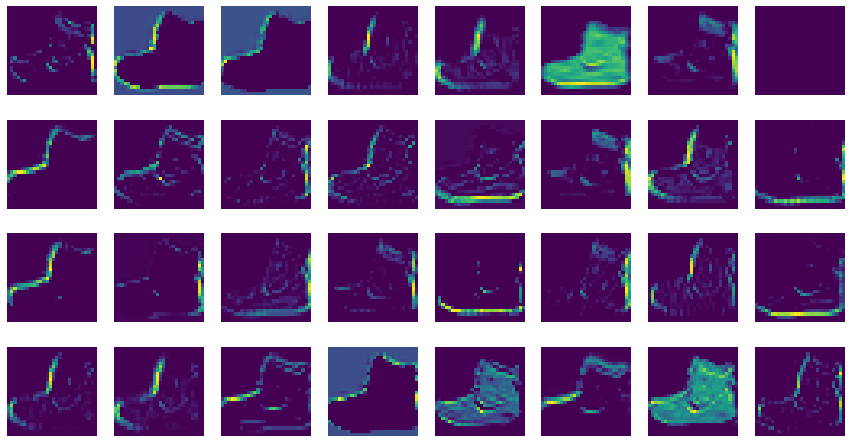

In [30]:
fig, axs = plt.subplots(4,8,figsize = (15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(f_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

In [31]:
cov_act2 = keras.Model(m.input,m.layers[2].output)
f2_map = cov_act2.predict(in_data[0:1])
f2_map.shape

(1, 14, 14, 64)

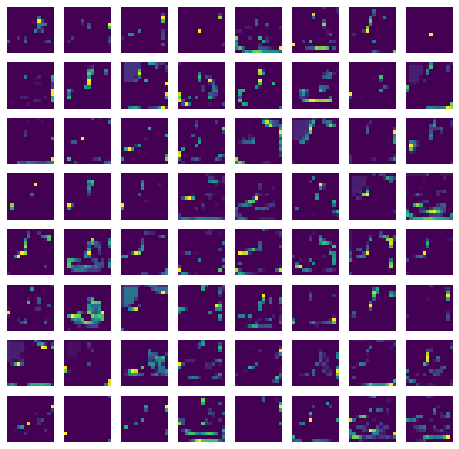

In [33]:
fig, axs = plt.subplots(8,8,figsize = (8,8))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(f2_map[0,:,:,i*8+j])
        axs[i,j].axis('off')